In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10


In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Function to preprocess images
def preprocess_image(image):
    image_gray = rgb2gray(image)  # Convert to grayscale
    image_resized = resize(image_gray, (32, 32))  # Resize to 32x32
    return image_resized

In [4]:
# Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        processed_image = preprocess_image(image)
        hog_feature = hog(processed_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_features.append(hog_feature)
    return np.array(hog_features)

In [5]:
# Extract HOG features for training and testing images (subset for efficiency)
X_train_hog = extract_hog_features(X_train[:5000])
X_test_hog = extract_hog_features(X_test[:1000])

In [6]:
# Normalize features
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

In [11]:
# Train a Logistic Regression classifier
clf = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial', random_state=42)
clf.fit(X_train_hog, y_train[:5000])  # Train on subset

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [8]:
# Predictions
y_pred = clf.predict(X_test_hog)

In [9]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test[:1000], y_pred))
print("Classification Report:\n", classification_report(y_test[:1000], y_pred))

Accuracy: 0.469
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.51      0.49       103
           1       0.54      0.56      0.55        89
           2       0.45      0.45      0.45       100
           3       0.38      0.34      0.36       103
           4       0.40      0.41      0.40        90
           5       0.35      0.34      0.34        86
           6       0.45      0.47      0.46       112
           7       0.58      0.52      0.55       102
           8       0.56      0.52      0.54       106
           9       0.51      0.54      0.52       109

    accuracy                           0.47      1000
   macro avg       0.47      0.47      0.47      1000
weighted avg       0.47      0.47      0.47      1000



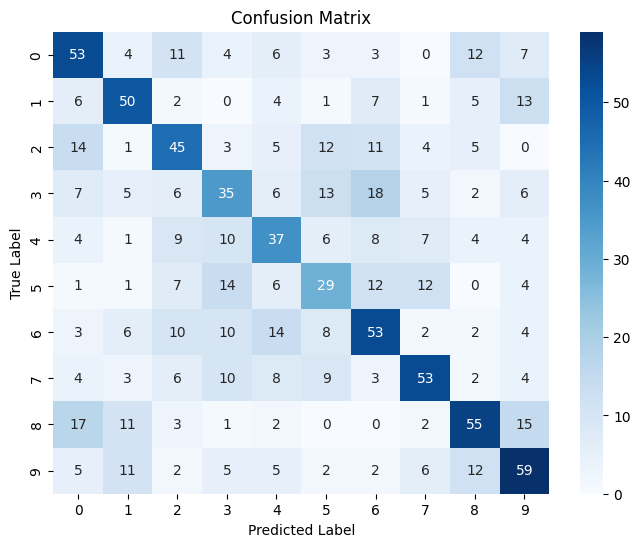

In [10]:
# Compute confusion matrix
cm = confusion_matrix(y_test[:1000], y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()